# ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ   
#### Εαρινό Εξάμηνο 2021 - 2022
#### Απόστολος Θεοδώρου - 1115201500046

### Εργασία 2 - Υπολογισμός χρόνου ταξιδιού μέσω συσταδοποίησης

### Ανάλυση Δεδομένων  

### 1)

In [1]:
import pandas as pd

#Convert the csv file's data into a dataframe
data= pd.read_csv('train.csv')
data= data.head(10000)
df_train= pd.DataFrame(data)

#find the minimum and maximum accepted trip time 
description_df= df_train.describe()
mean_trip_duration= description_df.at['mean', 'trip_duration']
std_trip_duration= description_df.at['std', 'trip_duration']
max_accepted_trip_duration= mean_trip_duration + 2 * std_trip_duration
max_accepted_trip_duration= int (max_accepted_trip_duration)
min_accepted_trip_duration= mean_trip_duration - 2 * std_trip_duration
if min_accepted_trip_duration < 0:
    min_accepted_trip_duration= 0
print (f"Accepted trip time is: {min_accepted_trip_duration}-{max_accepted_trip_duration} sec")

#print(description_df)
#print(df_train)

#remove the outliers
for i in range (len(df_train)):
    if df_train.at[i, 'trip_duration'] < min_accepted_trip_duration or df_train.at[i, 'trip_duration'] > max_accepted_trip_duration:
        df_train= df_train.drop(i) 
df_train= df_train.reset_index()
#print(df_train)

Accepted trip time is: 0-7271 sec


### 2) 

In [2]:
#print(df_train)
#focus on New York city
#remove points out of city's coordinates
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_longitude'] < -74.03 or \
    df_train.at[i, 'pickup_longitude'] > -73.75 or \
    df_train.at[i, 'pickup_latitude'] < 40.63 or \
    df_train.at[i, 'pickup_latitude'] > 40.85 or \
    df_train.at[i, 'dropoff_longitude'] < -74.03 or \
    df_train.at[i, 'dropoff_longitude'] > -73.75 or \
    df_train.at[i, 'dropoff_latitude'] < 40.63 or \
    df_train.at[i, 'dropoff_latitude'] > 40.85:
        df_train= df_train.drop(i)
df_train= df_train.reset_index()
#print(df_train)

### 3) 

Text(0, 0.5, 'Trips')

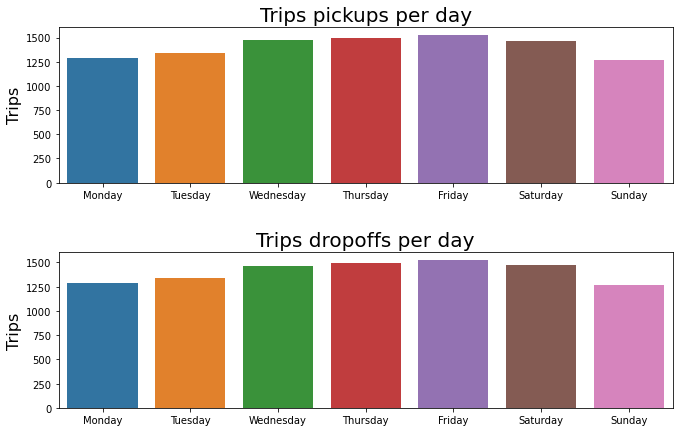

In [3]:
import seaborn as sns

#Convert the csv file's data into a dataframe
data= pd.read_csv('test.csv')
data= data.head(10000)
df_test= pd.DataFrame(data)

#convert the date and time format
df_train['pickup_datetime']= pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime']= pd.to_datetime(df_train['dropoff_datetime'])
df_test['pickup_datetime']= pd.to_datetime(df_test['pickup_datetime'])
#df_train.info()
#df_test.info()

#add the new columns to the dataframe
df_train['pickup_day_name']= "None"
df_test['pickup_day_name']= "None"
df_train['dropoff_day_name']= "None"
df_train['pickup_month']= "None"
df_test['pickup_month']= "None"
df_train['dropoff_month']= "None"
df_train['pickup_hour']= -1
df_test['pickup_hour']= -1
df_train['dropoff_hour']= -1
df_train['pickup_year']= -1
df_test['pickup_year']= -1
df_train['dropoff_year']= -1
df_train['pickup_season']= "None"
df_test['pickup_season']= "None"
df_train['dropoff_season']= "None"
df_train['pickup_day_period']= "None"
df_test['pickup_day_period']= "None"
df_train['dropoff_day_period']= "None"
#df_train.info()

#find day of the week
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_datetime'].dayofweek == 0:
        df_train.at[i, 'pickup_day_name']= "Monday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 1:
        df_train.at[i, 'pickup_day_name']= "Tuesday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 2:
        df_train.at[i, 'pickup_day_name']= "Wednesday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 3:
        df_train.at[i, 'pickup_day_name']= "Thursday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 4:
        df_train.at[i, 'pickup_day_name']= "Friday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 5:
        df_train.at[i, 'pickup_day_name']= "Saturday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 6:
        df_train.at[i, 'pickup_day_name']= "Sunday"
    else: 
        df_train.at[i, 'pickup_day_name']= "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_datetime'].dayofweek == 0:
        df_test.at[i, 'pickup_day_name']= "Monday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 1:
        df_test.at[i, 'pickup_day_name']= "Tuesday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 2:
        df_test.at[i, 'pickup_day_name']= "Wednesday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 3:
        df_test.at[i, 'pickup_day_name']= "Thursday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 4:
        df_test.at[i, 'pickup_day_name']= "Friday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 5:
        df_test.at[i, 'pickup_day_name']= "Saturday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 6:
        df_test.at[i, 'pickup_day_name']= "Sunday"
    else: 
        df_test.at[i, 'pickup_day_name']= "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_datetime'].dayofweek == 0:
        df_train.at[i, 'dropoff_day_name']= "Monday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 1:
        df_train.at[i, 'dropoff_day_name']= "Tuesday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 2:
        df_train.at[i, 'dropoff_day_name']= "Wednesday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 3:
        df_train.at[i, 'dropoff_day_name']= "Thursday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 4:
        df_train.at[i, 'dropoff_day_name']= "Friday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 5:
        df_train.at[i, 'dropoff_day_name']= "Saturday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 6:
        df_train.at[i, 'dropoff_day_name']= "Sunday"
    else: 
        df_train.at[i, 'dropoff_day_name']= "Error"

#find hour, month and year
for i in range (len(df_train)):
    df_train.at[i, 'pickup_hour']= df_train.at[i, 'pickup_datetime'].hour
    df_train.at[i, 'pickup_month']= df_train.at[i, 'pickup_datetime'].month
    df_train.at[i, 'pickup_year']= df_train.at[i, 'pickup_datetime'].year
    
for i in range (len(df_test)):
    df_test.at[i, 'pickup_hour']= df_test.at[i, 'pickup_datetime'].hour
    df_test.at[i, 'pickup_month']= df_test.at[i, 'pickup_datetime'].month
    df_test.at[i, 'pickup_year']= df_test.at[i, 'pickup_datetime'].year
    
for i in range (len(df_train)):
    df_train.at[i, 'dropoff_hour']= df_train.at[i, 'dropoff_datetime'].hour
    df_train.at[i, 'dropoff_month']= df_train.at[i, 'dropoff_datetime'].month
    df_train.at[i, 'dropoff_year']= df_train.at[i, 'dropoff_datetime'].year
        
#find season and day_period
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1 or df_train.at[i, 'pickup_month'] == 2 or df_train.at[i, 'pickup_month'] == 12:
        df_train.at[i, 'pickup_season'] = "Winter"
    elif df_train.at[i, 'pickup_month'] == 3 or df_train.at[i, 'pickup_month'] == 4 or df_train.at[i, 'pickup_month'] == 5:
        df_train.at[i, 'pickup_season'] = "Spring"
    elif df_train.at[i, 'pickup_month'] == 6 or df_train.at[i, 'pickup_month'] == 7 or df_train.at[i, 'pickup_month'] == 8:
        df_train.at[i, 'pickup_season'] = "Summer"
    elif df_train.at[i, 'pickup_month'] == 9 or df_train.at[i, 'pickup_month'] == 10 or df_train.at[i, 'pickup_month'] == 11:
        df_train.at[i, 'pickup_season'] = "Autumn"
    else:
        df_train.at[i, 'pickup_season'] == "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_month'] == 1 or df_test.at[i, 'pickup_month'] == 2 or df_test.at[i, 'pickup_month'] == 12:
        df_test.at[i, 'pickup_season'] = "Winter"
    elif df_test.at[i, 'pickup_month'] == 3 or df_test.at[i, 'pickup_month'] == 4 or df_test.at[i, 'pickup_month'] == 5:
        df_test.at[i, 'pickup_season'] = "Spring"
    elif df_test.at[i, 'pickup_month'] == 6 or df_test.at[i, 'pickup_month'] == 7 or df_test.at[i, 'pickup_month'] == 8:
        df_test.at[i, 'pickup_season'] = "Summer"
    elif df_test.at[i, 'pickup_month'] == 9 or df_test.at[i, 'pickup_month'] == 10 or df_test.at[i, 'pickup_month'] == 11:
        df_test.at[i, 'pickup_season'] = "Autumn"
    else:
        df_test.at[i, 'pickup_season'] == "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_month'] == 1 or df_train.at[i, 'dropoff_month'] == 2 or df_train.at[i, 'dropoff_month'] == 12:
        df_train.at[i, 'dropoff_season'] = "Winter"
    elif df_train.at[i, 'dropoff_month'] == 3 or df_train.at[i, 'dropoff_month'] == 4 or df_train.at[i, 'dropoff_month'] == 5:
        df_train.at[i, 'dropoff_season'] = "Spring"
    elif df_train.at[i, 'dropoff_month'] == 6 or df_train.at[i, 'dropoff_month'] == 7 or df_train.at[i, 'dropoff_month'] == 8:
        df_train.at[i, 'dropoff_season'] = "Summer"
    elif df_train.at[i, 'dropoff_month'] == 9 or df_train.at[i, 'dropoff_month'] == 10 or df_train.at[i, 'dropoff_month'] == 11:
        df_train.at[i, 'dropoff_season'] = "Autumn"
    else:
        df_train.at[i, 'dropoff_season'] == "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_hour'] >= 6 and df_train.at[i, 'pickup_hour'] <= 11:
        df_train.at[i, 'pickup_day_period']= "Morning"
    elif df_train.at[i, 'pickup_hour'] >= 12 and df_train.at[i, 'pickup_hour'] <= 15:
        df_train.at[i, 'pickup_day_period']= "Afternoon"
    elif df_train.at[i, 'pickup_hour'] >= 16 and df_train.at[i, 'pickup_hour'] <= 21:
        df_train.at[i, 'pickup_day_period']= "Evening"
    elif df_train.at[i, 'pickup_hour'] >= 22 or df_train.at[i, 'pickup_hour'] <= 5:
        df_train.at[i, 'pickup_day_period']= "Late Night"
    else:
        df_train.at[i, 'pickup_day_period']= "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_hour'] >= 6 and df_test.at[i, 'pickup_hour'] <= 11:
        df_test.at[i, 'pickup_day_period']= "Morning"
    elif df_test.at[i, 'pickup_hour'] >= 12 and df_test.at[i, 'pickup_hour'] <= 15:
        df_test.at[i, 'pickup_day_period']= "Afternoon"
    elif df_test.at[i, 'pickup_hour'] >= 16 and df_test.at[i, 'pickup_hour'] <= 21:
        df_test.at[i, 'pickup_day_period']= "Evening"
    elif df_test.at[i, 'pickup_hour'] >= 22 or df_test.at[i, 'pickup_hour'] <= 5:
        df_test.at[i, 'pickup_day_period']= "Late Night"
    else:
        df_test.at[i, 'pickup_day_period']= "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_hour'] >= 6 and df_train.at[i, 'dropoff_hour'] <= 11:
        df_train.at[i, 'dropoff_day_period']= "Morning"
    elif df_train.at[i, 'dropoff_hour'] >= 12 and df_train.at[i, 'dropoff_hour'] <= 15:
        df_train.at[i, 'dropoff_day_period']= "Afternoon"
    elif df_train.at[i, 'dropoff_hour'] >= 16 and df_train.at[i, 'dropoff_hour'] <= 21:
        df_train.at[i, 'dropoff_day_period']= "Evening"
    elif df_train.at[i, 'dropoff_hour'] >= 22 or df_train.at[i, 'dropoff_hour'] <= 5:
        df_train.at[i, 'dropoff_day_period']= "Late Night"
    else:
        df_train.at[i, 'dropoff_day_period']= "Error"
        
#print(df_train)

#Histograms
fig, axes = plt.subplots(2, 1, figsize=(11,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

#busiest pickup days
mon= tue= wed= thu= fri= sat= sun= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun+= 1
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
l= [mon, tue, wed, thu, fri, sat, sun]
df_busiest_pickup_days= pd.DataFrame()
df_busiest_pickup_days['count']= l
df_busiest_pickup_days['day']= days
#print(df_busiest_pickup_days)

sns.barplot(data= df_busiest_pickup_days, x='day', y='count', ax=axes[0])
axes[0].set_title("Trips pickups per day", fontsize=20)
axes[0].set_xlabel(None)
axes[0].set_ylabel("Trips", fontsize=16)

#busiest dropoff days
mon= tue= wed= thu= fri= sat= sun= 0
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_day_name'] == "Monday":
        mon+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Tuesday":
        tue+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Wednesday":
        wed+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Thursday":
        thu+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Friday":
        fri+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Saturday":
        sat+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Sunday":
        sun+= 1
             
l= [mon, tue, wed, thu, fri, sat, sun]
df_busiest_dropoff_days= pd.DataFrame()
df_busiest_dropoff_days['count']= l
df_busiest_dropoff_days['day']= days
#print(df_busiest_dropoff_days)


sns.barplot(data= df_busiest_dropoff_days, x='day', y='count', ax=axes[1])
axes[1].set_title("Trips dropoffs per day", fontsize=20)
axes[1].set_xlabel(None)
axes[1].set_ylabel("Trips", fontsize=16)


Όπως ήταν αναμενόμενο τα ιστογράμματα των πιο πολυσύχναστων pickup και dropoff days ταυτίζονται, αφού συνήθως όση κίνηση και να έχει ο δρόμος, το ταξί θα φτάσει στον προορισμό του την ίδια μέρα με αυτήν που ξεκίνησε.

Text(0, 0.5, 'Trips')

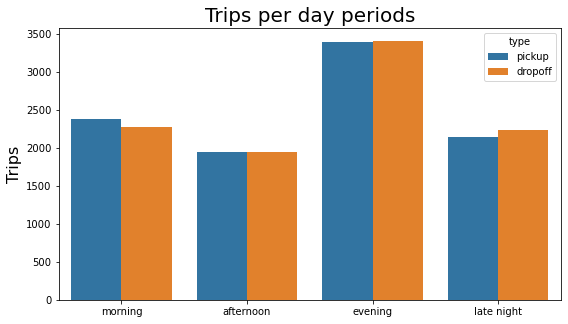

In [4]:
#Histograms


#busiest pickup and dropoff periods
mor= aft= eve= nig= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig+= 1
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
l= [mor, aft, eve, nig]
df1_busiest_day_period= pd.DataFrame()
df1_busiest_day_period['trips']= l
df1_busiest_day_period['period']= periods
df1_busiest_day_period['type']= 'pickup'
#print(df_busiest_pickup_day_period)

mor= aft= eve= nig= 0
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_day_period'] == "Morning":
        mor+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Afternoon":
        aft+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Evening":
        eve+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Late Night":
        nig+= 1
        
l= [mor, aft, eve, nig]
df2_busiest_day_period= pd.DataFrame()
df2_busiest_day_period['trips']= l
df2_busiest_day_period['period']= periods
df2_busiest_day_period['type']= 'dropoff'

df1_busiest_day_period= df1_busiest_day_period.append(df2_busiest_day_period)

plt.figure(figsize=(9,5))
ax = sns.barplot(x="period", y="trips", hue="type", data=df1_busiest_day_period)
ax.set_title("Trips per day periods", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Trips", fontsize=16)

Παρατηρούμε ότι οι περισσότερες μετακινήσεις λαμβάνουν χώρα το evening. Το afternoon η κίνηση είναι μειωμένη. Αυτό λογικά οφείλεται στο γεγονός ότι οι περισσότεροι άνθρωποι αυτήν την ώρα εργάζονται, αρα δεν είναι στον δρόμο. Στην μειωμένη κίνηση το afternοon ενδέχεται να συμβάλει επίσης η μειωμένη, σε σχέση με τις υπόλοιπες περιόδους της ημέρας, χρονική του διάρκεια (διαρκεί 4 ώρες, ενώ τα υπόλοιπα διαρκούν 6-8 ώρες). Τέλος γίνεται εμφανές ότι το morning και το afternoon οι αφίξεις είναι ελαφρώς λιγότερες από τις αναχωρήσεις. Επομένως η κίνηση γύρω στις 12:00 και γύρω στις 16:00 ενδέχεται να είναι κάπως αυξημένη.   

Text(0, 0.5, 'Trips')

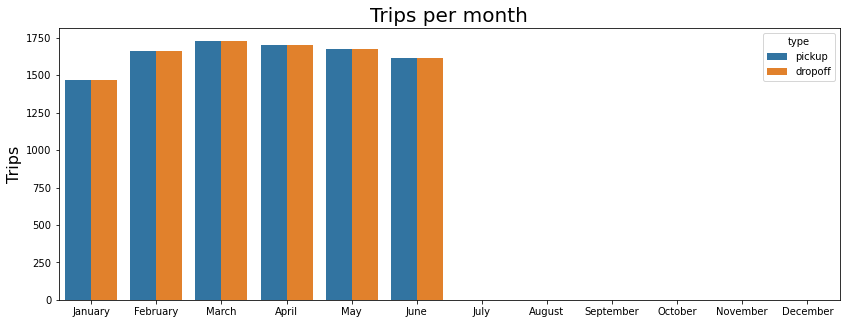

In [5]:
#Histograms


#busiest pickup and dropoff periods
jan= feb= mar= apr= may= jun= jul= aug= sep= octo= nov= dec= 0 
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1:
        jan+= 1
    elif df_train.at[i, 'pickup_month'] == 2:
        feb+= 1
    elif df_train.at[i, 'pickup_month'] == 3:
        mar+= 1
    elif df_train.at[i, 'pickup_month'] == 4:
        apr+= 1
    elif df_train.at[i, 'pickup_month'] == 5:
        may+= 1
    elif df_train.at[i, 'pickup_month'] == 6:
        jun+= 1
    elif df_train.at[i, 'pickup_month'] == 7:
        jul+= 1
    elif df_train.at[i, 'pickup_month'] == 8:
        aug+= 1
    elif df_train.at[i, 'pickup_month'] == 9:
        sep+= 1
    elif df_train.at[i, 'pickup_month'] == 10:
        octo+= 1
    elif df_train.at[i, 'pickup_month'] == 11:
        nov+= 1
    elif df_train.at[i, 'pickup_month'] == 12:
        dec+= 1
  
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']        
l= [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec]
df1_busiest_month= pd.DataFrame()
df1_busiest_month['trips']= l
df1_busiest_month['month']= months
df1_busiest_month['type']= 'pickup'

jan= feb= mar= apr= may= jun= jul= aug= sep= octo= nov= dec= 0 
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_month'] == 1:
        jan+= 1
    elif df_train.at[i, 'dropoff_month'] == 2:
        feb+= 1
    elif df_train.at[i, 'dropoff_month'] == 3:
        mar+= 1
    elif df_train.at[i, 'dropoff_month'] == 4:
        apr+= 1
    elif df_train.at[i, 'dropoff_month'] == 5:
        may+= 1
    elif df_train.at[i, 'dropoff_month'] == 6:
        jun+= 1
    elif df_train.at[i, 'dropoff_month'] == 7:
        jul+= 1
    elif df_train.at[i, 'dropoff_month'] == 8:
        aug+= 1
    elif df_train.at[i, 'dropoff_month'] == 9:
        sep+= 1
    elif df_train.at[i, 'dropoff_month'] == 10:
        octo+= 1
    elif df_train.at[i, 'dropoff_month'] == 11:
        nov+= 1
    elif df_train.at[i, 'dropoff_month'] == 12:
        dec+= 1
          
l= [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec]
df2_busiest_month= pd.DataFrame()
df2_busiest_month['trips']= l
df2_busiest_month['month']= months
df2_busiest_month['type']= 'dropoff'

df1_busiest_month= df1_busiest_month.append(df2_busiest_month)

plt.figure(figsize=(14,5))
ax = sns.barplot(x="month", y="trips", hue="type", data=df1_busiest_month)
ax.set_title("Trips per month", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Trips", fontsize=16)



Text(0, 0.5, 'Time in seconds')

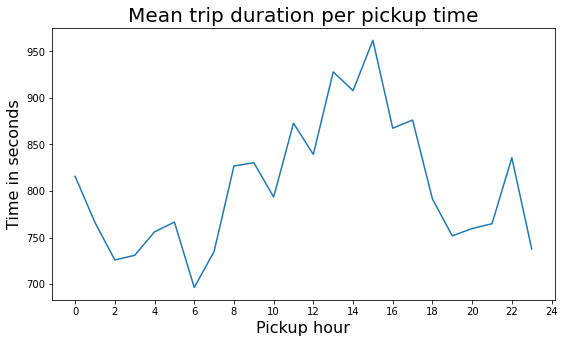

In [6]:
import matplotlib.ticker as ticker

duration_by_pickup_hour= [0] * 24
count= [0] * 24
for i in range(len(df_train)):
    for h in range (0, 24):
        if df_train.at[i, 'pickup_hour'] == h:
            duration_by_pickup_hour[h]+= df_train.at[i, 'trip_duration']
            count[h]+= 1

mean_duration_by_pickup_hour= [0.0] * 24
for i in range (0, 24):
    mean_duration_by_pickup_hour[i]= duration_by_pickup_hour[i] / count[i] 

line= pd.DataFrame()
line['mean_duration']= mean_duration_by_pickup_hour
line['pickup_hour']= list(range(0,24))

plt.figure(figsize=(9,5))
ax= sns.lineplot(data= line, x='pickup_hour', y='mean_duration')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_title("Mean trip duration per pickup time", fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)

Σε προηγούμενο διάγραμμα παρατηρήθηκε ότι το πλήθος των ταξιδιών κατά τις μεσημβρινές ώρες είναι μειωμένο. Εντούτοις, η μέση διάρκεια ταξιδιού τις ώρες αυτές είναι η υψηλότερη που καταγράφεται. Οι ενδείξεις μας για τη συγκεκριμένη χρονική περίοδο της ημέρας είναι αντικρουόμενες. Μία λογική εξήγηση θα ήταν ότι το μεσημέρι επικρατεί κίνηση στους δρόμους της Νέας Υόρκης η οποία όμως προκαλείται κυρίως από τους ιδιώτες οδηγούς και όχι τα ταξί. Τέλος, μία αναμενόμενη παρατήρηση, τις μεταμεσονύκτιες ώρες η μέση διάρκεια ταξιδιού είναι σχεδόν η μισή σε σχέση με τις ώρες αιχμής.

Text(0, 0.5, 'Time in seconds')

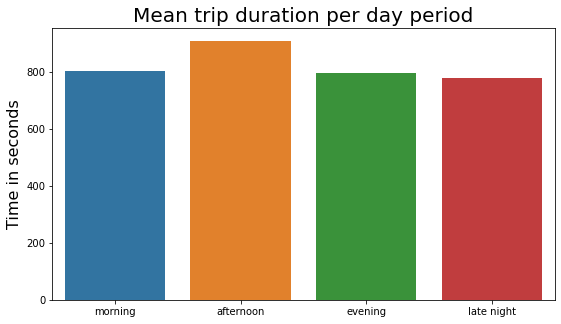

In [7]:
#Histograms

#mean trip duration per day period
mor_dur= aft_dur= eve_dur= nig_dur= 0
mor_count= aft_count= eve_count= nig_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor_count+= 1
        mor_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft_count+= 1
        aft_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve_count+= 1
        eve_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig_count+= 1
        nig_dur+= df_train.at[i, 'trip_duration']
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
mean_duration= [mor_dur/mor_count, aft_dur/aft_count, eve_dur/eve_count, nig_dur/nig_count]
df_mean_trip_duration_by_day_period= pd.DataFrame()
df_mean_trip_duration_by_day_period['mean_duration']= mean_duration
df_mean_trip_duration_by_day_period['period']= periods

plt.figure(figsize=(9,5))
ax = sns.barplot(x="period", y="mean_duration", data=df_mean_trip_duration_by_day_period)
ax.set_title("Mean trip duration per day period", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Time in seconds", fontsize=16)

Text(0, 0.5, 'Time in seconds')

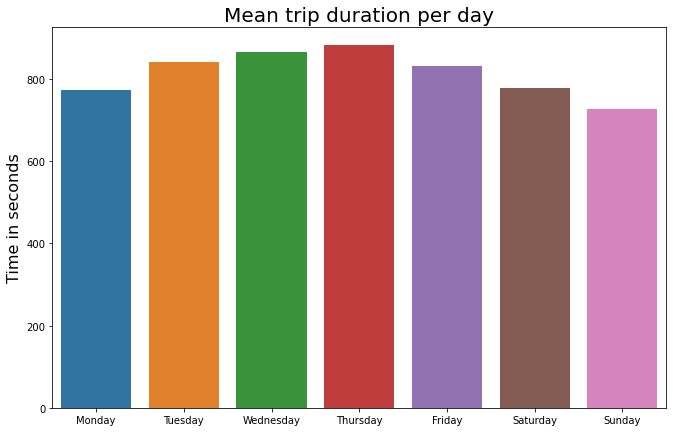

In [8]:
#mean trip duration per day of the week
mon_dur= tue_dur= wed_dur= thu_dur= fri_dur= sat_dur= sun_dur= 0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_dur+= df_train.at[i, 'trip_duration']
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
mean_duration= [mon_dur/mon_count, tue_dur/tue_count, wed_dur/wed_count, thu_dur/thu_count, fri_dur/fri_count, sat_dur/sat_count, sun_dur/sun_count]
df_mean_trip_duration_per_day= pd.DataFrame()
df_mean_trip_duration_per_day['mean_duration']= mean_duration
df_mean_trip_duration_per_day['day']= days

plt.figure(figsize=(11,7))
ax= sns.barplot(data= df_mean_trip_duration_per_day, x='day', y='mean_duration')
ax.set_title("Mean trip duration per day", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Time in seconds", fontsize=16)

Άλλο ένα παράδοξο. Παρόλο που οι μέρες με τα περισσότερα σε αριθμό ταξίδια είναι οι Πέμπτες και οι Παρασκευές, οι μέρες με τη μεγαλύτερη μέση διάρκεια ταξιδιού είναι η Τετάρτη, η Τρίτη και η Δευτέρα. Ενδεχομένως η αντίθεση αυτή να οφείλεται στις ώρες και τους λόγους των μετακινήσεων ανά ημέρα.

### 4) 

Text(0, 0.5, 'Trips')

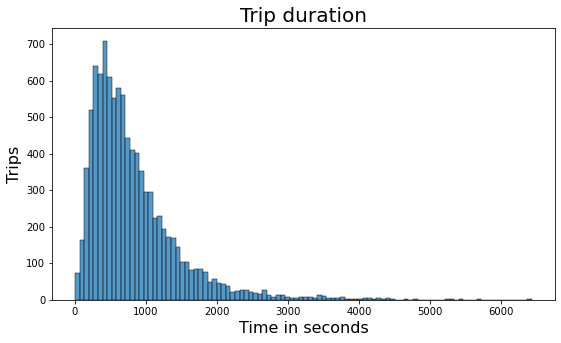

In [9]:
plt.figure(figsize=(9,5))
ax= sns.histplot(data= df_train, x='trip_duration', bins= 100)
ax.set_title("Trip duration", fontsize=20)
ax.set_xlabel("Time in seconds", fontsize=16)
ax.set_ylabel("Trips", fontsize=16)

Text(0, 0.5, 'Trips')

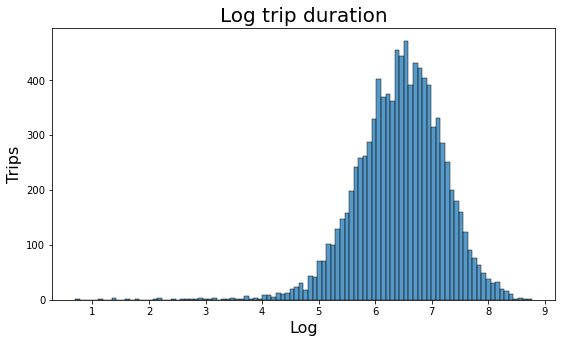

In [10]:
import numpy as np

df_train['log_trip_duration']= np.log(df_train['trip_duration'])

plt.figure(figsize=(9,5))
ax= sns.histplot(data= df_train, x='log_trip_duration', bins= 100)
ax.set_title("Log trip duration", fontsize=20)
ax.set_xlabel("Log", fontsize=16)
ax.set_ylabel("Trips", fontsize=16)

### 5)


In [11]:
company_A_dur= company_B_dur= 0
company_A_count= company_B_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'vendor_id'] == 1:
        company_A_count+=1
        company_A_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'vendor_id'] == 2:
        company_B_count+=1
        company_B_dur+= df_train.at[i, 'trip_duration']

mean_A= company_A_dur/company_A_count
mean_B= company_B_dur/company_B_count

mean_A_in_mins= mean_A/60
mean_B_in_mins= mean_B/60
print(mean_A_in_mins, mean_B_in_mins)

13.458969411092053 13.746914770536058


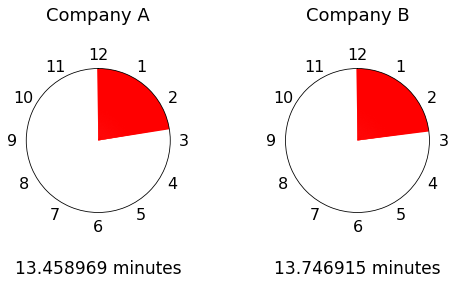

In [12]:
from numpy import pi

plt.subplots_adjust(left=1.5,
                    bottom=2.0, 
                    right=2.5, 
                    top=2.5, 
                    wspace=0.5, 
                    hspace=0.5)

ax = plt.subplot(121, polar=True)
ax.set_title("Company A\n", fontsize=18)


# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# set the circumference labels
ax.set_xticks(np.linspace(0, 2*pi, 12, endpoint=False))
ax.set_xticklabels([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], fontsize=16)


# make the labels go clockwise
ax.set_theta_direction(-1)

# place 12 at the top    
ax.set_theta_offset(pi/2.0)
plt.grid(None)

# put the points on the circumference
plt.ylim(0,1)

for i in np.arange(0, mean_A_in_mins, 0.1):
    ax.bar(i*0.1044, 1, width=0.03, bottom=0.0, color='r', linewidth=0.0)
ax.set_xlabel('\n%f minutes' %mean_A_in_mins, fontsize=17)




ax = plt.subplot(122, polar=True)
ax.set_title("Company B\n", fontsize=18)


# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# set the circumference labels
ax.set_xticks(np.linspace(0, 2*pi, 12, endpoint=False))
ax.set_xticklabels([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], fontsize=16)


# make the labels go clockwise
ax.set_theta_direction(-1)

# place 12 at the top    
ax.set_theta_offset(pi/2.0)
plt.grid(None)

# put the points on the circumference
plt.ylim(0,1)

for i in np.arange(0, mean_B_in_mins, 0.1):
    ax.bar(i*0.1044, 1, width=0.03, bottom=0.0, color='r', linewidth=0.0)
ax.set_xlabel('\n%f minutes' %mean_B_in_mins, fontsize=17)
plt.show()

Ο πάροχος της υπηρεσίας μεταφοράς φαίνεται να μην παίζει ουσιαστικό ρόλο στην διάρκεια του ταξιδιού

### 6) 

Text(0, 0.5, 'Time in seconds')

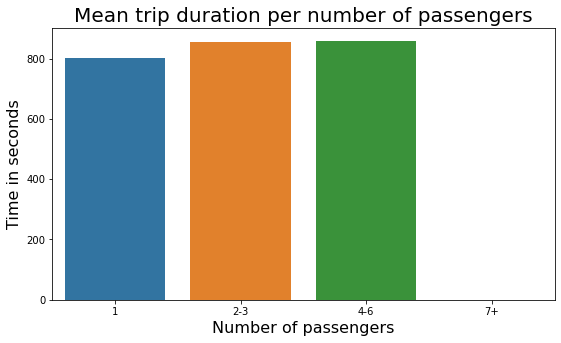

In [13]:
one= two_to_three= four_to_six= seven_or_more= 0
one_dur= two_to_three_dur= four_to_six_dur= seven_or_more_dur= 0
mean_one= mean_two_to_three= mean_four_to_six= mean_seven_or_more= 0

for i in range(len(df_train)):
    if df_train.at[i, 'passenger_count'] == 1:
        one+= 1
        one_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'passenger_count'] == 2 or df_train.at[i, 'passenger_count'] == 3:
        two_to_three+= 1
        two_to_three_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'passenger_count'] >= 4 and df_train.at[i, 'passenger_count'] <= 6:
        four_to_six+= 1
        four_to_six_dur+= df_train.at[i, 'trip_duration']
    else:
        seven_or_more+=1
        seven_or_more_dur+= df_train.at[i, 'trip_duration']

if one > 0:
    mean_one= one_dur/one
if two_to_three > 0:
    mean_two_to_three= two_to_three_dur/two_to_three
if four_to_six > 0:
    mean_four_to_six= four_to_six_dur/four_to_six
if seven_or_more > 0 :
    mean_seven_or_more= seven_or_more_dur/seven_or_more

l= [mean_one, mean_two_to_three, mean_four_to_six, mean_seven_or_more]
groups= ['1', '2-3', '4-6', '7+']
df_duration_passengers= pd.DataFrame()
df_duration_passengers['mean_duration']= l
df_duration_passengers['groups']= groups

plt.figure(figsize=(9,5))
ax= sns.barplot(data= df_duration_passengers, x='groups', y='mean_duration')
ax.set_title("Mean trip duration per number of passengers", fontsize=20)
ax.set_xlabel("Number of passengers", fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)

### 7) 

Text(0, 0.5, 'Distance in km')

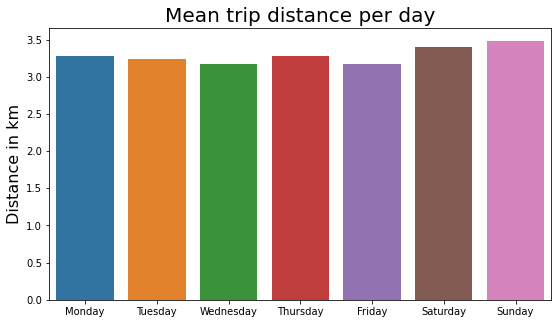

In [14]:
!pip install geopy
from sklearn.metrics.pairwise import manhattan_distances
from geopy.distance import geodesic as GD

df_train['manhattan_distance']= 0.0
df_test['manhattan_distance']= 0.0
df_train['km_distance']= 0.0
df_test['km_distance']= 0.0


for i in range (len(df_train)):
    pickup= (df_train.at[i, 'pickup_latitude'], df_train.at[i, 'pickup_longitude'])
    dropoff= (df_train.at[i, 'dropoff_latitude'], df_train.at[i, 'dropoff_longitude'])
    df_train.at[i, 'manhattan_distance']= manhattan_distances([pickup], [dropoff], sum_over_features=True)[0][0]
    df_train.at[i, 'km_distance']= GD(pickup, dropoff).km
    
for i in range (len(df_test)):
    pickup= (df_test.at[i, 'pickup_latitude'], df_test.at[i, 'pickup_longitude'])
    dropoff= (df_test.at[i, 'dropoff_latitude'], df_test.at[i, 'dropoff_longitude'])
    df_test.at[i, 'manhattan_distance']= manhattan_distances([pickup], [dropoff], sum_over_features=True)[0][0]
    df_test.at[i, 'km_distance']= GD(pickup, dropoff).km


mon_dist= tue_dist= wed_dist= thu_dist= fri_dist= sat_dist= sun_dist= 0.0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0
mon_mean= tue_mean= wed_mean= thu_mean= fri_mean= sat_mean= sun_mean= 0.0

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_dist+= df_train.at[i, 'km_distance']

mon_mean= mon_dist/mon_count
tue_mean= tue_dist/tue_count
wed_mean= wed_dist/wed_count
thu_mean= thu_dist/thu_count
fri_mean= fri_dist/fri_count
sat_mean= sat_dist/sat_count
sun_mean= sun_dist/sun_count

df_mean_dist_per_day= pd.DataFrame()
df_mean_dist_per_day['mean_dist']= [mon_mean, tue_mean, wed_mean, thu_mean, fri_mean, sat_mean, sun_mean]
df_mean_dist_per_day['day']= days

plt.figure(figsize=(9,5))
ax= sns.barplot(data= df_mean_dist_per_day, x='day', y='mean_dist')
ax.set_title("Mean trip distance per day", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Distance in km", fontsize=16)



Η μέση απόσταση κυμαίνεται μεταξύ 3 και 4 χιλιομέτρων και δεν φαίνεται να επηρεάζεται ιδιαίτερα από την ημέρα

Text(0, 0.5, 'Time in seconds')

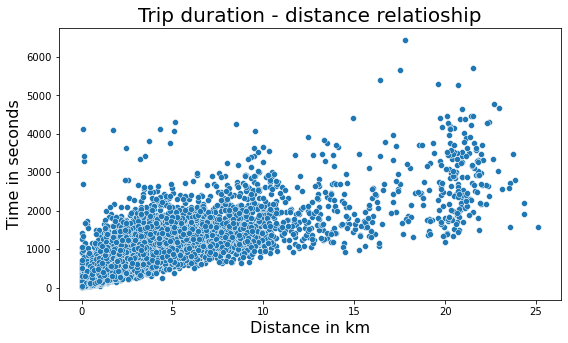

In [15]:
plt.figure(figsize=(9,5))
ax= sns.scatterplot(data= df_train, x= 'km_distance', y='trip_duration')
ax.set_title("Trip duration - distance relatioship", fontsize=20)
ax.set_xlabel("Distance in km", fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)


### 8)


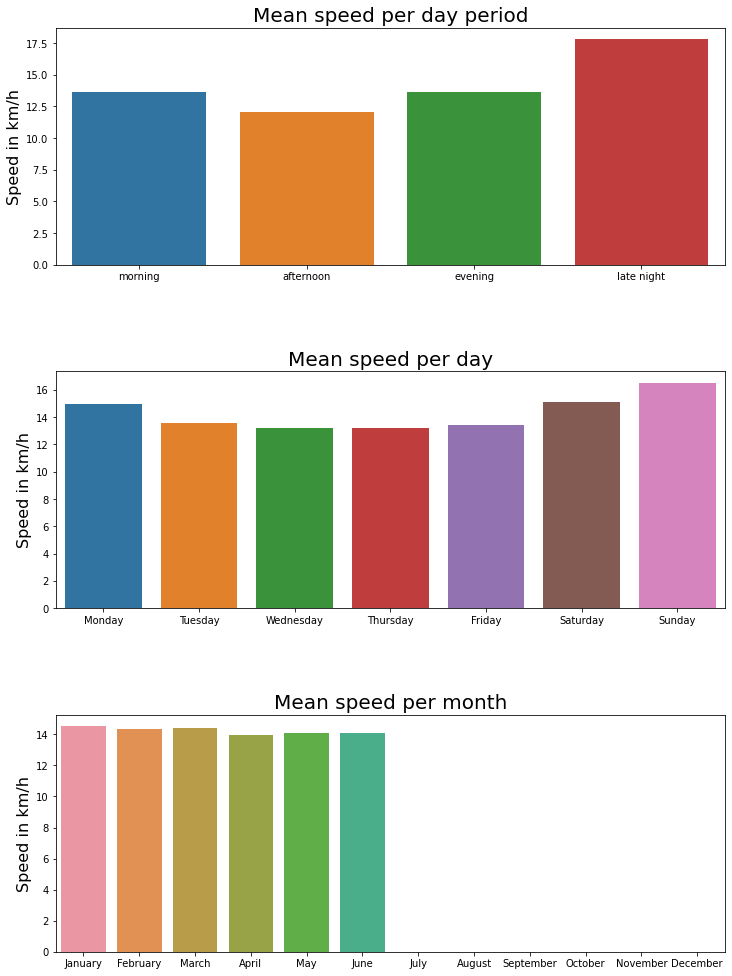

In [16]:
df_train['mean_speed']= 0.0
for i in range (len(df_train)):
    df_train.at[i,'mean_speed']= df_train.at[i, 'km_distance']/ (df_train.at[i, 'trip_duration']/3600)


#mean speed per day period
mor_spe= aft_spe= eve_spe= nig_spe= 0
mor_count= aft_count= eve_count= nig_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor_count+= 1
        mor_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft_count+= 1
        aft_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve_count+= 1
        eve_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig_count+= 1
        nig_spe+= df_train.at[i, 'mean_speed']
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
mean_speed= [mor_spe/mor_count, aft_spe/aft_count, eve_spe/eve_count, nig_spe/nig_count]
df_mean_speed_by_day_period= pd.DataFrame()
df_mean_speed_by_day_period['mean_speed']= mean_speed
df_mean_speed_by_day_period['period']= periods

fig, axes = plt.subplots(3, 1, figsize=(12,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)


sns.barplot(x="period", y="mean_speed", data=df_mean_speed_by_day_period, ax= axes[0])
axes[0].set_title("Mean speed per day period", fontsize=20)
axes[0].set_xlabel(None)
axes[0].set_ylabel("Speed in km/h", fontsize=16)


#mean speed per day of the week
mon_spe= tue_spe= wed_spe= thu_spe= fri_spe= sat_spe= sun_spe= 0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_spe+= df_train.at[i, 'mean_speed']
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
mean_speed= [mon_spe/mon_count, tue_spe/tue_count, wed_spe/wed_count, thu_spe/thu_count, fri_spe/fri_count, sat_spe/sat_count, sun_spe/sun_count]
df_mean_speed_per_day= pd.DataFrame()
df_mean_speed_per_day['mean_speed']= mean_speed
df_mean_speed_per_day['day']= days

sns.barplot(data= df_mean_speed_per_day, x='day', y='mean_speed', ax= axes[1])
axes[1].set_title("Mean speed per day", fontsize=20)
axes[1].set_xlabel(None)
axes[1].set_ylabel("Speed in km/h", fontsize=16)


#Mean speed per month
jan_spe= feb_spe= mar_spe= apr_spe= may_spe= jun_spe= jul_spe= aug_spe= sep_spe= octo_spe= nov_spe= dec_spe= 0
jan_count= feb_count= mar_count= apr_count= may_count= jun_count= jul_count= aug_count= sep_count= octo_count= nov_count= dec_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1:
        jan_count+= 1
        jan_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 2:
        feb_count+= 1
        feb_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 3:
        mar_count+= 1
        mar_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 4:
        apr_count+= 1
        apr_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 5:
        may_count+= 1
        may_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 6:
        jun_count+= 1
        jun_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 7:
        jul_count+= 1
        jul_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 8:
        aug_count+= 1
        aug_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 9:
        sep_count+= 1
        sep_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 10:
        octo_count+= 1
        octo_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 11:
        nov_count+= 1
        nov_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 12:
        dec_count+= 1
        dec_spe+= df_train.at[i, 'mean_speed']
  
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']        

if jan_count != 0:
    jan_mean= jan_spe/jan_count
else: 
    jan_mean=0.0
if feb_count != 0:
    feb_mean= feb_spe/feb_count
else: 
    feb_mean=0.0
if mar_count != 0:
    mar_mean= mar_spe/mar_count
else: 
    mar_mean=0.0
if apr_count != 0:
    apr_mean= apr_spe/apr_count
else: 
    apr_mean=0.0
if may_count != 0:
    may_mean= may_spe/may_count
else: 
    may_mean=0.0
if jun_count != 0:
    jun_mean= jun_spe/jun_count
else: 
    jun_mean=0.0
if jul_count != 0:
    jul_mean= jul_spe/jul_count
else: 
    jul_mean=0.0
if aug_count != 0:
    aug_mean= aug_spe/aug_count
else: 
    aug_mean=0.0
if sep_count != 0:
    sep_mean= sep_spe/sep_count
else: 
    sep_mean=0.0
if octo_count != 0:
    octo_mean= octo_spe/octo_count
else: 
    octo_mean=0.0
if nov_count != 0:
    nov_mean= nov_spe/nov_count
else: 
    nov_mean=0.0
if dec_count != 0:
    dec_mean= dec_spe/dec_count
else: 
    dec_mean=0.0

mean_speed= [jan_mean, feb_mean, mar_mean, apr_mean, may_mean, jun_mean, jul_mean, aug_mean, sep_mean, octo_mean, nov_mean, dec_mean]
df_mean_speed_per_month= pd.DataFrame()
df_mean_speed_per_month['mean_speed']= mean_speed
df_mean_speed_per_month['month']= months

sns.barplot(x="month", y="mean_speed", data=df_mean_speed_per_month, ax= axes[2])
axes[2].set_title("Mean speed per month", fontsize=20)
axes[2].set_xlabel(None)
axes[2].set_ylabel("Speed in km/h", fontsize=16)

plt.show()

Διαπιστώνεται ότι η Κυριακή είναι η μέρα με την υψηλότερη μέση ταχύτητα. Δεν μας παραξενεύει, μιας και η Κυριακή είναι για πολλούς ημέρα ξεκούρασης και δεν υποχρεούνται να χρησιμοποιήσουν κάποιο όχημα για να πάνε στην εργασία τους. Επιπλέον η μέση ταχύτητα παρουσιάζεται αυξημένη τις νυχτερινές ώρες, όταν ο δρόμος αναμένεται να είναι σχετικά άδειος. Τέλος 

### 9)


Text(0, 0.5, 'Latitude')

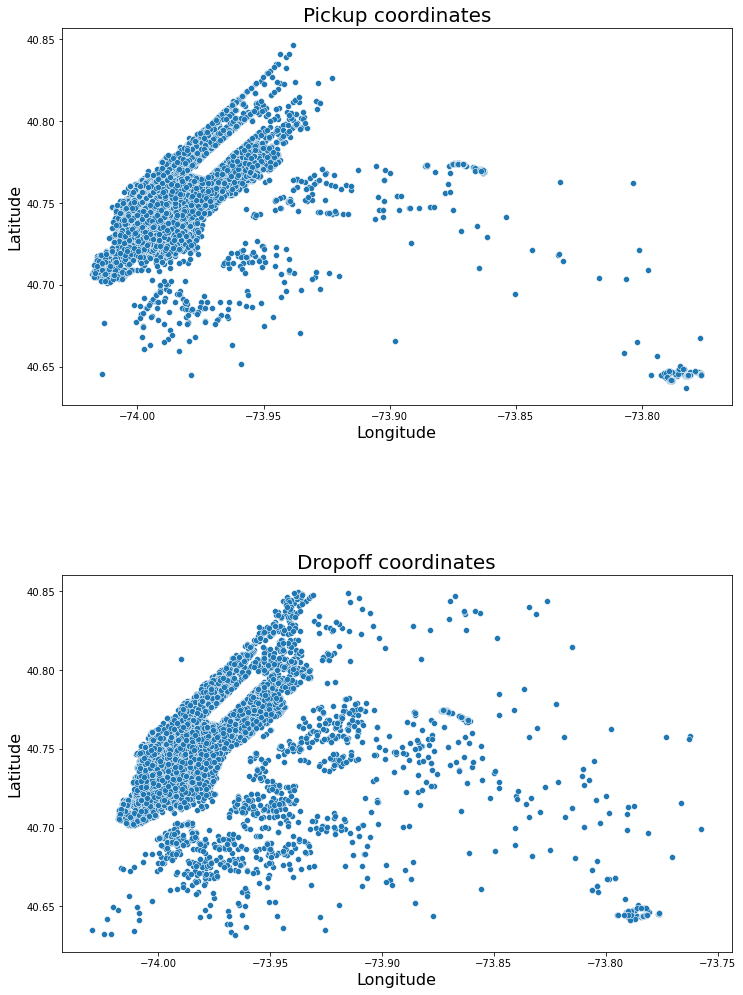

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)


sns.scatterplot(data= df_train, x= 'pickup_longitude', y='pickup_latitude', ax= axes[0])
axes[0].set_title("Pickup coordinates", fontsize=20)
axes[0].set_xlabel("Longitude", fontsize=16)
axes[0].set_ylabel("Latitude", fontsize=16)

sns.scatterplot(data= df_train, x= 'dropoff_longitude', y='dropoff_latitude', ax= axes[1])
axes[1].set_title("Dropoff coordinates", fontsize=20)
axes[1].set_xlabel("Longitude", fontsize=16)
axes[1].set_ylabel("Latitude", fontsize=16)

Τα δύο  scatter plots είναι αρκετά όμοια. Αυτό είναι ένα αποτέλεσμα που συμφωνεί με προηγούμενο scatter plot δίαγραμμα στο οποίο παρουσιάζονταν οι αποστάσεις και στο οποίο διαφαινόταν, ότι κατά κύριο λόγο οι Νεοϋορκέζοι επιλέγουν ταξί για την κάλυψη μικρών αποστάσεων.Επομένως για τις περισσότερες διαδρομές, οι συντεταγμένες στον τερματισμό αναμένουμε να διαφέρουν ελάχιστα από τις συντεταγμένες στην έναρξη, αποδίδοντας παρόμοια διαγράμματα.

Επίσης, αναζητώντας τις συντεταγμένες στον χάρτη (https://www.gps-coordinates.net/) παρατηρούμε ότι η συντριπτική πλειοψηφία των ταξιδιών ξεκινούν και καταλήγουν σε περιοχές του κέντρου της Νέας Υόρκης, νοτίως και εκατέρωθεν του Central Park, σε αντίθεση με περιοχές βορειότερα, όπως το Harlem και το Bronx, όπου η χρήση ταξί είναι ελάχιστη. 

Τέλος, υπάρχει ένα cluster κάτω δεξιά με ταξίδια από και προς το αεροδρόμιο.

### Συσταδοποίηση και πρόβλεψη διάρκειας ταξιδιού

### 1)


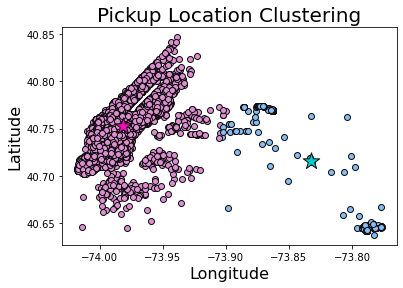

In [18]:
from sklearn.cluster import KMeans
import numpy as np

X= np.zeros(shape=(len(df_train), 2))
for i in range (len(df_train)):
    X[i][0]= df_train.at[i, 'pickup_latitude']
    X[i][1]= df_train.at[i, 'pickup_longitude']

kmeans = KMeans(n_clusters=2).fit(X)
df_kmeans= pd.DataFrame()
df_kmeans['latitude']= 0.0
df_kmeans['longitude']= 0.0
df_kmeans['cluster']= 0
for i in range(len(X)):
    df_kmeans.at[i, 'latitude']= X[i][0]
    df_kmeans.at[i, 'longitude']= X[i][1]
    df_kmeans.at[i, 'cluster']= kmeans.labels_[i]


for i in range (len(df_kmeans)):
    if df_kmeans.at[i, 'cluster'] == 0:
        plt.scatter(df_kmeans.at[i, 'longitude'], df_kmeans.at[i, 'latitude'], c="#db91d0", edgecolors='#0f0b0f')
    elif df_kmeans.at[i, 'cluster'] == 1:
        plt.scatter(df_kmeans.at[i, 'longitude'], df_kmeans.at[i, 'latitude'], c="#85bcf2", edgecolors='#0f0b0f')
        
plt.scatter(kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][0], c="#fa0abe", edgecolors='#0f0b0f', marker="*", s= 300)
plt.scatter(kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][0], c="#02ced1", edgecolors='#0f0b0f', marker="*", s= 300)

plt.title("Pickup Location Clustering", fontsize=20)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

plt.show()

Οι τοποθεσίες έναρξης των ταξιδιών μπορούν να ομαδοποιηθούν αρκετά ευδιάκριτα σε 2 clusters. Το πρώτο (μπλε) αποτελείται από τα ταξίδια που πραγματοποιήθηκαν εντός της πόλης της Νέας Υόρκης (ως επί των πλείστων στην περιοχή του Μανχάτταν). Στο δεύτερο συγκαταλέγονται τα ταξίδια που είχαν σημείο έναρξης ένα από τα δύο αεροδρόμια της πόλης (LaGuardia Airport στο κέντρο, John F. Kennedy International Airport κάτω δεξιά).

### 2)

Text(0, 0.5, 'Weight of importance')

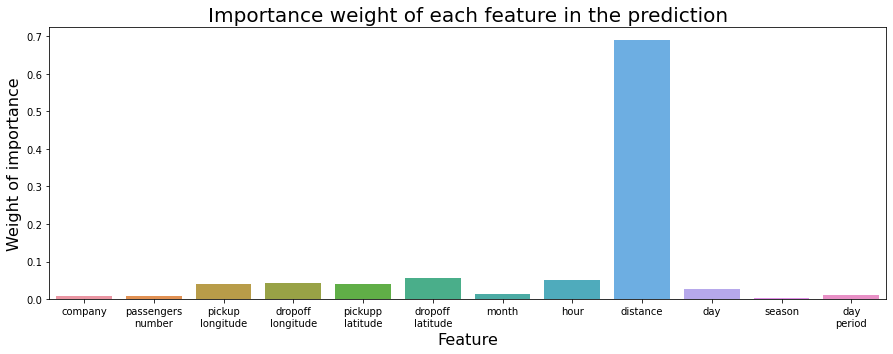

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train= pd.DataFrame()
X_test= pd.DataFrame()
X_train['vendor_id']= df_train['vendor_id']  
X_test['vendor_id']= df_test['vendor_id']
X_train['passenger_count']= df_train['passenger_count']
X_test['passenger_count']= df_test['passenger_count']
X_train['pickup_longitude']= df_train['pickup_longitude']
X_test['pickup_longitude']= df_test['pickup_longitude']
X_train['dropoff_longitude']= df_train['dropoff_longitude']
X_test['dropoff_longitude']= df_test['dropoff_longitude']
X_train['pickup_latitude']= df_train['pickup_latitude']
X_test['pickup_latitude']= df_test['pickup_latitude']
X_train['dropoff_latitude']= df_train['dropoff_latitude']
X_test['dropoff_latitude']= df_test['dropoff_latitude']
X_train['pickup_month']= df_train['pickup_month']
X_test['pickup_month']= df_test['pickup_month']
X_train['pickup_hour']= df_train['pickup_hour']
X_test['pickup_hour']= df_test['pickup_hour']
X_train['km_distance']= df_train['km_distance']
X_test['km_distance']= df_test['km_distance']


#Convert day name, season, day period from string to integers
# 1->Monday, 2->Tuesday, ..., 7->Sunday
X_train['pickup_day']= 0  
X_test['pickup_day']= 0
# 1->Winter, 2->Spring, 3->Summer, 4->Autumn
X_train['pickup_season']= 0
X_test['pickup_season']= 0
# 1->Morning, 2->Afternoon, 3->Evening, 4->Late Night
X_train['pickup_day_period']= 0
X_test['pickup_day_period']= 0

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == 'Monday':
        X_train.at[i, 'pickup_day']= 1
    elif df_train.at[i, 'pickup_day_name'] == 'Tuesday':
        X_train.at[i, 'pickup_day']= 2
    elif df_train.at[i, 'pickup_day_name'] == 'Wednesday':
        X_train.at[i, 'pickup_day']= 3
    elif df_train.at[i, 'pickup_day_name'] == 'Thurday':
        X_train.at[i, 'pickup_day']= 4
    elif df_train.at[i, 'pickup_day_name'] == 'Friday':
        X_train.at[i, 'pickup_day']= 5
    elif df_train.at[i, 'pickup_day_name'] == 'Saturday':
        X_train.at[i, 'pickup_day']= 6
    elif df_train.at[i, 'pickup_day_name'] == 'Sunday':
        X_train.at[i, 'pickup_day']= 7
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_day_name'] == 'Monday':
        X_test.at[i, 'pickup_day']= 1
    elif df_test.at[i, 'pickup_day_name'] == 'Tuesday':
        X_test.at[i, 'pickup_day']= 2
    elif df_test.at[i, 'pickup_day_name'] == 'Wednesday':
        X_test.at[i, 'pickup_day']= 3
    elif df_test.at[i, 'pickup_day_name'] == 'Thurday':
        X_test.at[i, 'pickup_day']= 4
    elif df_test.at[i, 'pickup_day_name'] == 'Friday':
        X_test.at[i, 'pickup_day']= 5
    elif df_test.at[i, 'pickup_day_name'] == 'Saturday':
        X_test.at[i, 'pickup_day']= 6
    elif df_test.at[i, 'pickup_day_name'] == 'Sunday':
        X_test.at[i, 'pickup_day']= 7
#X_train['pickup_day_name']= df_train['pickup_day_name']
#X_test['pickup_day_name']= df_test['pickup_day_name']

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_season'] == 'Winter':
        X_train.at[i, 'pickup_season']= 1
    elif df_train.at[i, 'pickup_season'] == 'Spring':
        X_train.at[i, 'pickup_season']= 2
    elif df_train.at[i, 'pickup_season'] == 'Summer':
        X_train.at[i, 'pickup_season']= 3
    elif df_train.at[i, 'pickup_season'] == 'Autumn':
        X_train.at[i, 'pickup_season']= 4
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_season'] == 'Winter':
        X_test.at[i, 'pickup_season']= 1
    elif df_test.at[i, 'pickup_season'] == 'Spring':
        X_test.at[i, 'pickup_season']= 2
    elif df_test.at[i, 'pickup_season'] == 'Summer':
        X_test.at[i, 'pickup_season']= 3
    elif df_test.at[i, 'pickup_season'] == 'Autumn':
        X_test.at[i, 'pickup_season']= 4
#X_train['pickup_season']= df_train['pickup_season']
#X_test['pickup_season']= df_test['pickup_season']

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == 'Morning':
        X_train.at[i, 'pickup_day_period']= 1
    elif df_train.at[i, 'pickup_day_period'] == 'Afternoon':
        X_train.at[i, 'pickup_day_period']= 2
    elif df_train.at[i, 'pickup_day_period'] == 'Evening':
        X_train.at[i, 'pickup_day_period']= 3
    elif df_train.at[i, 'pickup_day_period'] == 'Late Night':
        X_train.at[i, 'pickup_day_period']= 4
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_day_period'] == 'Morning':
        X_test.at[i, 'pickup_day_period']= 1
    elif df_test.at[i, 'pickup_day_period'] == 'Afternoon':
        X_test.at[i, 'pickup_day_period']= 2
    elif df_test.at[i, 'pickup_day_period'] == 'Evening':
        X_test.at[i, 'pickup_day_period']= 3
    elif df_test.at[i, 'pickup_day_period'] == 'Late Night':
        X_test.at[i, 'pickup_day_period']= 4
#X_train['pickup_day_period']= df_train['pickup_day_period']
#X_test['pickup_day_period']= df_test['pickup_day_period']

y_log= df_train['log_trip_duration']
y= df_train['trip_duration']

regr = RandomForestRegressor()
regr.fit(X_train, y_log)
predictions_log= regr.predict(X_test)
#print(len(predictions_log))
#print(predictions_log)

importances = regr.feature_importances_

df_importances= pd.DataFrame()
df_importances['weight']= importances
df_importances['features']= ['company', 'passengers\nnumber', 'pickup\nlongitude', 'dropoff\nlongitude','pickupp\nlatitude', 'dropoff\nlatitude', 'month', 'hour', 'distance', 'day', 'season', 'day\nperiod']

plt.figure(figsize=(15,5))
ax= sns.barplot(x="features", y="weight", data=df_importances)
ax.set_title("Importance weight of each feature in the prediction", fontsize=20)
ax.set_xlabel("Feature", fontsize=16)
ax.set_ylabel("Weight of importance", fontsize=16)

#regr.fit(X_train, y)
#predictions= regr.predict(X_test)
#print(len(predictions))
#print(predictions)



Όπως αναμφισβήτητα προκύπτει από το ιστόγραμμα, η σημασία της απόστασης που το ταξί καλείται να διανύσει έχει την πιο βαρύνουσα σημασία στην εκτίμηση του χρόνου του ταξιδιού. Ακολούθως κάποια χαρακτηριστικά που τείνουν να έχουν μια επίδραση στην πρόβλεψη είναι η ώρα και οι συντεταγμένες. Ενδεχομένως περιοχές του κέντρου με πιο πυκνή κυκλοφορία και ώρες αιχμής να προσδίδουν μια ελαφριά προσαύξηση στον προβλεπόμενο χρόνο άφιξης στον προορισμό. Τέλος, η εταιρία φαίνεται να είναι εντελώς αμελητέα μεταβλητή. Αυτό το συμπέρασμα επιβεβαιώνεται και από τους μέσους χρόνους εξυπηρέτησης κάθε εταιρίας, οι οποίοι, όπως φάνηκε σε προηγούμενο διάγραμμα, διέφεραν κατά λιγότερο από μισό λεπτό. 

### 3)


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50,500], 'max_depth':[1,500], 'max_features':[1,12]}
regr = RandomForestRegressor()
GSCV_regr = GridSearchCV(regr, parameters)
GSCV_regr.fit(X_train, y_log)
GSCV_regr.best_params_


{'max_depth': 500, 'max_features': 12, 'n_estimators': 500}

### 4)

In [21]:
regr = RandomForestRegressor(max_depth=500, max_features=12, n_estimators= 500)
regr.fit(X_train, y_log)
predictions_log= regr.predict(X_test)


### 5)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Convert the csv file's data into a dataframe
data= pd.read_csv('target.csv')
data= data.head(10000)
df_target= pd.DataFrame(data)

df_target['log_trip_duration']= 0.0
for i in range(len(df_target)):
    df_target.at[i, 'log_trip_duration']= np.log(df_target.at[i, 'trip_duration'])

mae= mean_absolute_error(df_target['log_trip_duration'], predictions_log)
mse= mean_squared_error(df_target['log_trip_duration'], predictions_log)

print( mae, mse)

0.29633751063832153 0.19441480207434597


### Bonus ερωτήματα

Ο πρώτος χάρτης απεικονίζει τα πρώτα 100 pickup locations, ενώ ο δεύτερος το αντίστοιχα dropoff locations

In [34]:
!pip install folium pandas

import folium
pickups= folium.Map(location=[40.74, -73.89], zoom_start=11)

for i in range(0,100):
    
    marker = folium.Marker(
        location=[df_train.at[i, 'pickup_latitude'],df_train.at[i, 'pickup_longitude']])
        
    marker.add_to(pickups)
pickups

In [35]:
dropoffs= folium.Map(location=[40.74, -73.89], zoom_start=11)
for i in range(0,100):
    
    marker = folium.Marker(
        location=[df_train.at[i, 'dropoff_latitude'],df_train.at[i, 'dropoff_longitude']]) 
    marker.add_to(dropoffs)
dropoffs

### Σε ποιες περιοχές πηγαίνουν αυτοί που ξεκινούν από το Manhattan;

In [74]:
df_train['pickup_location']= 'Other'
df_train['dropoff_location']= 'Other'

#pickup location
for i in range(len(df_train)):
    #Manhattan
    if df_train.at[i, 'pickup_longitude'] > -74.01840:
        if df_train.at[i, 'pickup_latitude'] >= 40.748419 and df_train.at[i, 'pickup_latitude'] < 40.78648:
            if df_train.at[i, 'pickup_longitude']  < -73.947508:
                df_train.at[i, 'pickup_location']= 'MHT_CentralPark'
        elif df_train.at[i, 'pickup_latitude'] > 40.708731 and df_train.at[i, 'pickup_latitude'] < 40.748419:
            if df_train.at[i, 'pickup_longitude'] <-73.968021:
                df_train.at[i, 'pickup_location']= 'MHT_EmpireStateBuilding'
        elif df_train.at[i, 'pickup_latitude'] > 40.697269 and df_train.at[i, 'pickup_latitude'] < 40.708731:
            if df_train.at[i, 'pickup_longitude'] < -73.99711:
                df_train.at[i, 'pickup_location']= 'MHT_WallStreet'
    #JFK airport
    if df_train.at[i, 'pickup_longitude'] < -73.74832 and df_train.at[i, 'pickup_longitude'] > -73.82314:
        if df_train.at[i, 'pickup_latitude'] > 40.620659 and df_train.at[i, 'pickup_latitude'] < 40.670631:
            df_train.at[i, 'pickup_location']= 'JFK_Airport'
    #La Guardoa airport
    if df_train.at[i, 'pickup_longitude'] < -73.856957 and df_train.at[i, 'pickup_longitude'] > -73.8888:
        if df_train.at[i, 'pickup_latitude'] > 40.763074 and df_train.at[i, 'pickup_latitude'] < 40.785553:
            df_train.at[i, 'pickup_location']= 'LaGuardia_Airport'
    #Brooklyn
    if (df_train.at[i, 'pickup_longitude'] < -73.886998 and df_train.at[i, 'pickup_longitude'] > -74.02261) or\
    (df_train.at[i, 'pickup_longitude'] < -73.8461 and df_train.at[i, 'pickup_longitude'] > -73.966477):
        if (df_train.at[i, 'pickup_latitude'] > 40.5721 and df_train.at[i, 'pickup_latitude'] < 40.69713) or\
        (df_train.at[i, 'pickup_latitude'] > 40.697101 and df_train.at[i, 'pickup_latitude'] < 40.742918):
            df_train.at[i, 'pickup_location']= 'Brooklyn'
    #Long Island
    if (df_train.at[i, 'pickup_longitude'] < -73.895495 and df_train.at[i, 'pickup_longitude'] > -73.947105) or\
    (df_train.at[i, 'pickup_longitude'] < -73.89601 and df_train.at[i, 'pickup_longitude'] > -73.940556):
        if (df_train.at[i, 'pickup_latitude'] > 40.768806 and df_train.at[i, 'pickup_latitude'] < 40.768805) or\
        (df_train.at[i, 'pickup_latitude'] > 40.697101 and df_train.at[i, 'pickup_latitude'] < 40.77763):
            df_train.at[i, 'pickup_location']= 'LongIsland'
    #Harlem
    if (df_train.at[i, 'pickup_longitude'] < -73.9353953 and df_train.at[i, 'pickup_longitude'] > -73.979341) or\
    (df_train.at[i, 'pickup_longitude'] < -73.931619 and df_train.at[i, 'pickup_longitude'] > -73.972045):
        if (df_train.at[i, 'pickup_latitude'] > 40.78649 and df_train.at[i, 'pickup_latitude'] < 40.807294) or\
        (df_train.at[i, 'pickup_latitude'] > 40.807295 and df_train.at[i, 'pickup_latitude'] < 40.822646):
            df_train.at[i, 'pickup_location']= 'Harlem'
    #Bronx
    if df_train.at[i, 'pickup_longitude'] < -73.878146 and df_train.at[i, 'pickup_longitude'] > -73.934709:
        if df_train.at[i, 'pickup_latitude'] > 40.809936 and df_train.at[i, 'pickup_latitude'] < 40.84346:
            df_train.at[i, 'pickup_location']= 'Bronx'
            
            
#dropoff location           
for i in range(len(df_train)):
    #Manhattan
    if df_train.at[i, 'dropoff_longitude'] > -74.01840:
        if df_train.at[i, 'dropoff_latitude'] >= 40.748419 and df_train.at[i, 'dropoff_latitude'] < 40.78648:
            if df_train.at[i, 'dropoff_longitude']  < -73.947508:
                df_train.at[i, 'dropoff_location']= 'MHT_CentralPark'
        elif df_train.at[i, 'dropoff_latitude'] > 40.708731 and df_train.at[i, 'dropoff_latitude'] < 40.748419:
            if df_train.at[i, 'dropoff_longitude'] <-73.968021:
                df_train.at[i, 'dropoff_location']= 'MHT_EmpireStateBuilding'
        elif df_train.at[i, 'dropoff_latitude'] > 40.697269 and df_train.at[i, 'dropoff_latitude'] < 40.708731:
            if df_train.at[i, 'dropoff_longitude'] < -73.99711:
                df_train.at[i, 'dropoff_location']= 'MHT_WallStreet'
    #JFK airport
    if df_train.at[i, 'dropoff_longitude'] < -73.74832 and df_train.at[i, 'dropoff_longitude'] > -73.82314:
        if df_train.at[i, 'dropoff_latitude'] > 40.620659 and df_train.at[i, 'dropoff_latitude'] < 40.670631:
            df_train.at[i, 'dropoff_location']= 'JFK_Airport'
    #La Guardoa airport
    if df_train.at[i, 'dropoff_longitude'] < -73.856957 and df_train.at[i, 'dropoff_longitude'] > -73.8888:
        if df_train.at[i, 'dropoff_latitude'] > 40.763074 and df_train.at[i, 'dropoff_latitude'] < 40.785553:
            df_train.at[i, 'dropoff_location']= 'LaGuardia_Airport'
    #Brooklyn
    if (df_train.at[i, 'dropoff_longitude'] < -73.886998 and df_train.at[i, 'dropoff_longitude'] > -74.02261) or\
    (df_train.at[i, 'dropoff_longitude'] < -73.8461 and df_train.at[i, 'dropoff_longitude'] > -73.966477):
        if (df_train.at[i, 'dropoff_latitude'] > 40.5721 and df_train.at[i, 'dropoff_latitude'] < 40.69713) or\
        (df_train.at[i, 'dropoff_latitude'] > 40.697101 and df_train.at[i, 'dropoff_latitude'] < 40.742918):
            df_train.at[i, 'dropoff_location']= 'Brooklyn'
    #Long Island
    if (df_train.at[i, 'dropoff_longitude'] < -73.895495 and df_train.at[i, 'dropoff_longitude'] > -73.947105) or\
    (df_train.at[i, 'dropoff_longitude'] < -73.89601 and df_train.at[i, 'dropoff_longitude'] > -73.940556):
        if (df_train.at[i, 'dropoff_latitude'] > 40.768806 and df_train.at[i, 'dropoff_latitude'] < 40.768805) or\
        (df_train.at[i, 'dropoff_latitude'] > 40.697101 and df_train.at[i, 'dropoff_latitude'] < 40.77763):
            df_train.at[i, 'dropoff_location']= 'LongIsland'
    #Harlem
    if (df_train.at[i, 'dropoff_longitude'] < -73.9353953 and df_train.at[i, 'dropoff_longitude'] > -73.979341) or\
    (df_train.at[i, 'dropoff_longitude'] < -73.931619 and df_train.at[i, 'dropoff_longitude'] > -73.972045):
        if (df_train.at[i, 'dropoff_latitude'] > 40.78649 and df_train.at[i, 'dropoff_latitude'] < 40.807294) or\
        (df_train.at[i, 'dropoff_latitude'] > 40.807295 and df_train.at[i, 'dropoff_latitude'] < 40.822646):
            df_train.at[i, 'dropoff_location']= 'Harlem'
    #Bronx
    if df_train.at[i, 'dropoff_longitude'] < -73.878146 and df_train.at[i, 'dropoff_longitude'] > -73.934709:
        if df_train.at[i, 'dropoff_latitude'] > 40.809936 and df_train.at[i, 'dropoff_latitude'] < 40.84346:
            df_train.at[i, 'dropoff_location']= 'Bronx'
            
#________________________            
#Same for test dataframe
df_test['pickup_location']= 'Other'
df_test['dropoff_location']= 'Other'

#pickup location
for i in range(len(df_test)):
    #Manhattan
    if df_test.at[i, 'pickup_longitude'] > -74.01840:
        if df_test.at[i, 'pickup_latitude'] >= 40.748419 and df_test.at[i, 'pickup_latitude'] < 40.78648:
            if df_test.at[i, 'pickup_longitude']  < -73.947508:
                df_test.at[i, 'pickup_location']= 'MHT_CentralPark'
        elif df_test.at[i, 'pickup_latitude'] > 40.708731 and df_test.at[i, 'pickup_latitude'] < 40.748419:
            if df_test.at[i, 'pickup_longitude'] <-73.968021:
                df_test.at[i, 'pickup_location']= 'MHT_EmpireStateBuilding'
        elif df_test.at[i, 'pickup_latitude'] > 40.697269 and df_test.at[i, 'pickup_latitude'] < 40.708731:
            if df_test.at[i, 'pickup_longitude'] < -73.99711:
                df_test.at[i, 'pickup_location']= 'MHT_WallStreet'
    #JFK airport
    if df_test.at[i, 'pickup_longitude'] < -73.74832 and df_test.at[i, 'pickup_longitude'] > -73.82314:
        if df_test.at[i, 'pickup_latitude'] > 40.620659 and df_test.at[i, 'pickup_latitude'] < 40.670631:
            df_test.at[i, 'pickup_location']= 'JFK_Airport'
    #La Guardoa airport
    if df_test.at[i, 'pickup_longitude'] < -73.856957 and df_test.at[i, 'pickup_longitude'] > -73.8888:
        if df_test.at[i, 'pickup_latitude'] > 40.763074 and df_test.at[i, 'pickup_latitude'] < 40.785553:
            df_test.at[i, 'pickup_location']= 'LaGuardia_Airport'
    #Brooklyn
    if (df_test.at[i, 'pickup_longitude'] < -73.886998 and df_test.at[i, 'pickup_longitude'] > -74.02261) or\
    (df_test.at[i, 'pickup_longitude'] < -73.8461 and df_test.at[i, 'pickup_longitude'] > -73.966477):
        if (df_test.at[i, 'pickup_latitude'] > 40.5721 and df_test.at[i, 'pickup_latitude'] < 40.69713) or\
        (df_test.at[i, 'pickup_latitude'] > 40.697101 and df_test.at[i, 'pickup_latitude'] < 40.742918):
            df_test.at[i, 'pickup_location']= 'Brooklyn'
    #Long Island
    if (df_test.at[i, 'pickup_longitude'] < -73.895495 and df_test.at[i, 'pickup_longitude'] > -73.947105) or\
    (df_test.at[i, 'pickup_longitude'] < -73.89601 and df_test.at[i, 'pickup_longitude'] > -73.940556):
        if (df_test.at[i, 'pickup_latitude'] > 40.768806 and df_test.at[i, 'pickup_latitude'] < 40.768805) or\
        (df_test.at[i, 'pickup_latitude'] > 40.697101 and df_test.at[i, 'pickup_latitude'] < 40.77763):
            df_test.at[i, 'pickup_location']= 'LongIsland'
    #Harlem
    if (df_test.at[i, 'pickup_longitude'] < -73.9353953 and df_test.at[i, 'pickup_longitude'] > -73.979341) or\
    (df_test.at[i, 'pickup_longitude'] < -73.931619 and df_test.at[i, 'pickup_longitude'] > -73.972045):
        if (df_test.at[i, 'pickup_latitude'] > 40.78649 and df_test.at[i, 'pickup_latitude'] < 40.807294) or\
        (df_test.at[i, 'pickup_latitude'] > 40.807295 and df_test.at[i, 'pickup_latitude'] < 40.822646):
            df_test.at[i, 'pickup_location']= 'Harlem'
    #Bronx
    if df_test.at[i, 'pickup_longitude'] < -73.878146 and df_test.at[i, 'pickup_longitude'] > -73.934709:
        if df_test.at[i, 'pickup_latitude'] > 40.809936 and df_test.at[i, 'pickup_latitude'] < 40.84346:
            df_test.at[i, 'pickup_location']= 'Bronx'
            
            
#dropoff location           
for i in range(len(df_test)):
    #Manhattan
    if df_test.at[i, 'dropoff_longitude'] > -74.01840:
        if df_test.at[i, 'dropoff_latitude'] >= 40.748419 and df_test.at[i, 'dropoff_latitude'] < 40.78648:
            if df_test.at[i, 'dropoff_longitude']  < -73.947508:
                df_test.at[i, 'dropoff_location']= 'MHT_CentralPark'
        elif df_test.at[i, 'dropoff_latitude'] > 40.708731 and df_test.at[i, 'dropoff_latitude'] < 40.748419:
            if df_test.at[i, 'dropoff_longitude'] <-73.968021:
                df_test.at[i, 'dropoff_location']= 'MHT_EmpireStateBuilding'
        elif df_test.at[i, 'dropoff_latitude'] > 40.697269 and df_test.at[i, 'dropoff_latitude'] < 40.708731:
            if df_test.at[i, 'dropoff_longitude'] < -73.99711:
                df_test.at[i, 'dropoff_location']= 'MHT_WallStreet'
    #JFK airport
    if df_test.at[i, 'dropoff_longitude'] < -73.74832 and df_test.at[i, 'dropoff_longitude'] > -73.82314:
        if df_test.at[i, 'dropoff_latitude'] > 40.620659 and df_test.at[i, 'dropoff_latitude'] < 40.670631:
            df_test.at[i, 'dropoff_location']= 'JFK_Airport'
    #La Guardoa airport
    if df_test.at[i, 'dropoff_longitude'] < -73.856957 and df_test.at[i, 'dropoff_longitude'] > -73.8888:
        if df_test.at[i, 'dropoff_latitude'] > 40.763074 and df_test.at[i, 'dropoff_latitude'] < 40.785553:
            df_test.at[i, 'dropoff_location']= 'LaGuardia_Airport'
    #Brooklyn
    if (df_test.at[i, 'dropoff_longitude'] < -73.886998 and df_test.at[i, 'dropoff_longitude'] > -74.02261) or\
    (df_test.at[i, 'dropoff_longitude'] < -73.8461 and df_test.at[i, 'dropoff_longitude'] > -73.966477):
        if (df_test.at[i, 'dropoff_latitude'] > 40.5721 and df_test.at[i, 'dropoff_latitude'] < 40.69713) or\
        (df_test.at[i, 'dropoff_latitude'] > 40.697101 and df_test.at[i, 'dropoff_latitude'] < 40.742918):
            df_test.at[i, 'dropoff_location']= 'Brooklyn'
    #Long Island
    if (df_test.at[i, 'dropoff_longitude'] < -73.895495 and df_test.at[i, 'dropoff_longitude'] > -73.947105) or\
    (df_test.at[i, 'dropoff_longitude'] < -73.89601 and df_test.at[i, 'dropoff_longitude'] > -73.940556):
        if (df_test.at[i, 'dropoff_latitude'] > 40.768806 and df_test.at[i, 'dropoff_latitude'] < 40.768805) or\
        (df_test.at[i, 'dropoff_latitude'] > 40.697101 and df_test.at[i, 'dropoff_latitude'] < 40.77763):
            df_test.at[i, 'dropoff_location']= 'LongIsland'
    #Harlem
    if (df_test.at[i, 'dropoff_longitude'] < -73.9353953 and df_test.at[i, 'dropoff_longitude'] > -73.979341) or\
    (df_test.at[i, 'dropoff_longitude'] < -73.931619 and df_test.at[i, 'dropoff_longitude'] > -73.972045):
        if (df_test.at[i, 'dropoff_latitude'] > 40.78649 and df_test.at[i, 'dropoff_latitude'] < 40.807294) or\
        (df_test.at[i, 'dropoff_latitude'] > 40.807295 and df_test.at[i, 'dropoff_latitude'] < 40.822646):
            df_test.at[i, 'dropoff_location']= 'Harlem'
    #Bronx
    if df_test.at[i, 'dropoff_longitude'] < -73.878146 and df_test.at[i, 'dropoff_longitude'] > -73.934709:
        if df_test.at[i, 'dropoff_latitude'] > 40.809936 and df_test.at[i, 'dropoff_latitude'] < 40.84346:
            df_test.at[i, 'dropoff_location']= 'Bronx'

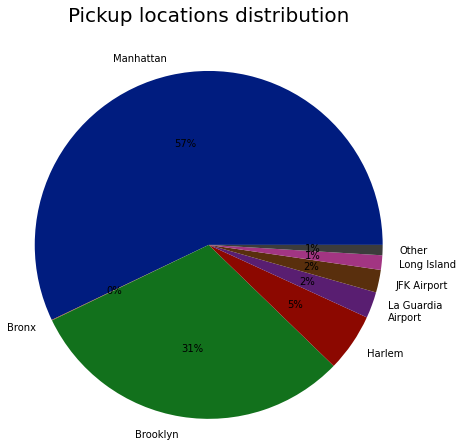

In [64]:
mht= harlem= lg_air= jfk_air= bronx= li= brooklyn= other= 0
#find the destinations of those who started from Manhattan
for i in range(len(df_train)):
    if df_train.at[i, 'pickup_location'] == "MHT_CentralPark" or \
    df_train.at[i, 'pickup_location'] == "MHT_EmpireStateBuilding" or\
    df_train.at[i, 'pickup_location'] == "MHT_WallStreet":
        if df_train.at[i, 'dropoff_location'] == "MHT_CentralPark" or \
        df_train.at[i, 'dropoff_location'] == "MHT_EmpireStateBuilding" or\
        df_train.at[i, 'dropoff_location'] == "MHT_WallStreet":
            mht+= 1
        elif df_train.at[i, 'dropoff_location'] == "Harlem":
            harlem+= 1
        elif df_train.at[i, 'dropoff_location'] == "Bronx":
            bronx+= 1
        elif df_train.at[i, 'dropoff_location'] == "LongIsland":
            li+= 1
        elif df_train.at[i, 'dropoff_location'] == "Brooklyn":
            brooklyn+= 1
        elif df_train.at[i, 'dropoff_location'] == "LaGuardia_Airport":
            lg_air+= 1
        elif df_train.at[i, 'dropoff_location'] == "JFK_Airport":
            jfk_air+= 1
        elif df_train.at[i, 'dropoff_location'] == "Other":
            other+= 1

#find the counts of the pickup locations
mht_pu= harlem_pu= lg_air_pu= jfk_air_pu= bronx_pu= li_pu= brooklyn_pu= other_pu= 0
for i in range(len(df_train)):
    if df_train.at[i, 'pickup_location'] == "MHT_CentralPark" or \
    df_train.at[i, 'pickup_location'] == "MHT_EmpireStateBuilding" or\
    df_train.at[i, 'pickup_location'] == "MHT_WallStreet":
        mht_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "Harlem":
        harlem_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "Bronx":
        bronx_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "LongIsland":
        li_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "Brooklyn":
        brooklyn_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "LaGuardia_Airport":
        lg_air_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "JFK_Airport":
        jfk_air_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "Other":
        other_pu+= 1

data= [mht_pu, bronx_pu, brooklyn_pu, harlem_pu, lg_air_pu, jfk_air_pu,  li_pu,  other_pu]
labels= ['Manhattan', 'Bronx', 'Brooklyn', 'Harlem',  'La Guardia\nAirport', 'JFK Airport',  'Long Island',  'Other']
colors= sns.color_palette('dark')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', radius=2.0)
plt.title("Pickup locations distribution", y=1.5, fontsize = 20)
plt.show()

Στο παραπάνω διάγραμμα βλέπουμε από ποια μέρη της Νέας Υόρκης ξεκινούν τα ταξίδια με ταξί. Το Manhattan κατέχει τη μερίδα του λέοντος, με περισσότερα από τα μισά ταξίδια να αρχίζουν από εκεί. Το πολυπληθές Brooklyn κατατάσσεται 2ο με σχεδόν το ένα τρίτο των ταξιδιών. Οι υπόλοιπες τοποθεσίες αριθμούν συνολικά 11%, με το Bronx να μην έχει ούτε ένα ταξίδι. 

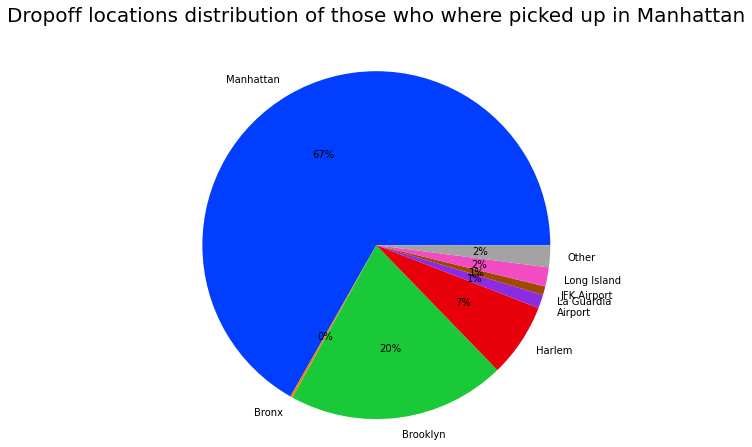

In [66]:
data= [mht, bronx, brooklyn, harlem, lg_air, jfk_air,  li,  other]
labels= ['Manhattan', 'Bronx', 'Brooklyn', 'Harlem',  'La Guardia\nAirport', 'JFK Airport',  'Long Island',  'Other']
colors= sns.color_palette('bright')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', radius=2.0)
plt.title("Dropoff locations distribution of those who where picked up in Manhattan", y=1.5, fontsize = 20)
plt.show()

Η πλειοψηφία των ταξιδιών που ξεκινούν στο Manhattan καταλήγουν στο ίδιο το Manhattan. Το ένα πέμπτο από αυτά κατευθύνεται προς το Brooklyn (ίσως στη γέφυρα του Brooklyn να εντοπίζεται συνωστισμός). Μόνο το 7% καταλήγει στο κοντινό Harlem. Σε ακόμα μακρυνότετους προορισμούς τα ταξίδια γίνονται ακόμη πιο σπάνια.

### Ποιο σημείο του Manhattan έχει τα περισσότερα pickups και ποιο τα περισσότερα dropoffs


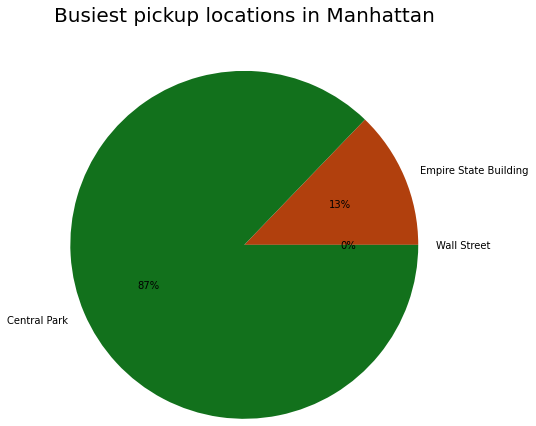

In [67]:
ws_pu= esb_pu= cp_pu= 0
ws_do= esb_do= cp_do= 0

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_location'] == "MHT_WallStreet":
        ws_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "MHT_EmpireStateBuilding":
        esb_pu+= 1
    elif df_train.at[i, 'pickup_location'] == "MHT_CentralPark":
        cp_pu+= 1
        
for i in range(len(df_train)):
    if df_train.at[i, 'dropoff_location'] == "MHT_WallStreet":
        ws_do+= 1
    elif df_train.at[i, 'dropoff_location'] == "MHT_EmpireStateBuilding":
        esb_do+= 1
    elif df_train.at[i, 'dropoff_location'] == "MHT_CentralPark":
        cp_do+= 1
        
data= [ws_pu, esb_pu, cp_pu]
labels= ['Wall Street', 'Empire State Building', 'Central Park']
colors= sns.color_palette('dark')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', radius=2.0)
plt.title("Busiest pickup locations in Manhattan", y=1.5, fontsize = 20)
plt.show()

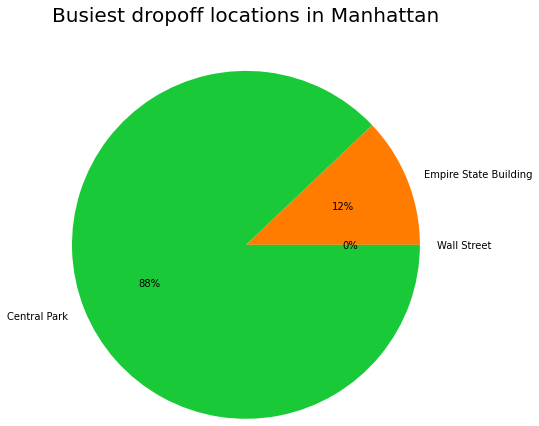

In [68]:
data= [ws_do, esb_do, cp_do]
labels= ['Wall Street', 'Empire State Building', 'Central Park']
colors= sns.color_palette('bright')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', radius=2.0)
plt.title("Busiest dropoff locations in Manhattan", y=1.5, fontsize = 20)
plt.show()

Παρατηρούμε ότι το μέρος με την περισσότερη ζήτηση σε ταξί είναι η περιοχή γύρω από το Central Park. Οι περιοχές νοτιότερα του Empire State Building φαίνεται πως απορροφούν μόλις το 12% με 13% των ταξιδιών. Τα γραφήματα αυτά αναδεικνύουν το γεγονός ότι οι περισσότερες διαδρομές είναι διαδρομές κοντινών αποστάσεων, εντός των ορίων μιας συνοικίας.

### Εκπαίδευση μοντέλου και πρόβλεψη βασισμένη στα features dropoff και pickup location

Στην εκπαίδευση του προηγούμενου μοντέλου έιδαμε ότι τα features με τη μεγαλύτερη βαρύτητα ήταν η απόσταση και οι συντεταγμένες αφετηρίας και προορισμού. Θα επιχειρήσουμε λοιπόν, έχοντας ήδη κάνει μια ομαδοποίηση και κατηγοριοποίηση των συντεταγμένων σε γειτονιές, να προβλέψουμε τον χρόνο ταξιδιού, αγνοώντας όλα τα άλλα features που είχαν μικρή σημασία και διατηρώντας μόνο την χιλιομετρική απόσταση και τις γειτονιές αφετηρίας και προορισμού.

Text(0, 0.5, 'Weight of importance')

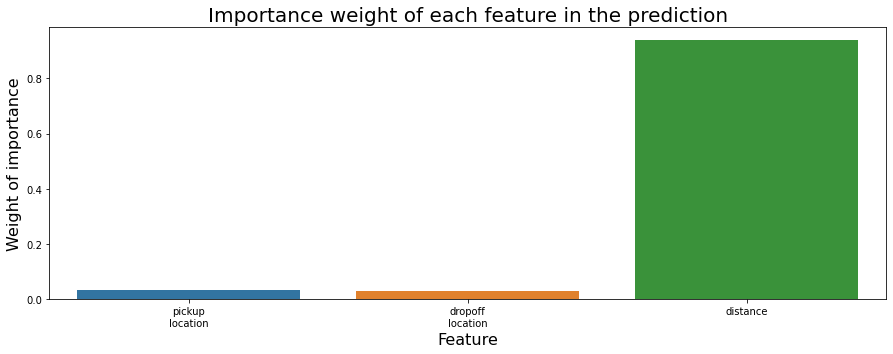

In [76]:
X_new_train= pd.DataFrame()
X_new_train['pickup_location']= 0
X_new_train['dropoff_location']= 0
X_new_train['km_distance']= df_train['km_distance']

X_new_test= pd.DataFrame()
X_new_test['pickup_location']= 0
X_new_test['dropoff_location']= 0
X_new_test['km_distance']= df_test['km_distance']

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_location'] == "MHT_CentralPark":
        X_new_train.at[i, 'pickup_location']= 1
    elif df_train.at[i, 'pickup_location'] == "MHT_EmpireStateBuilding":
        X_new_train.at[i, 'pickup_location']= 2
    elif df_train.at[i, 'pickup_location'] == "MHT_WallStreet":
        X_new_train.at[i, 'pickup_location']= 3
    elif df_train.at[i, 'pickup_location'] == "Harlem":
        X_new_train.at[i, 'pickup_location']= 4
    elif df_train.at[i, 'pickup_location'] == "Bronx":
        X_new_train.at[i, 'pickup_location']= 5
    elif df_train.at[i, 'pickup_location'] == "LongIsland":
        X_new_train.at[i, 'pickup_location']= 6
    elif df_train.at[i, 'pickup_location'] == "Brooklyn":
        X_new_train.at[i, 'pickup_location']= 7
    elif df_train.at[i, 'pickup_location'] == "LaGuardia_Airport":
        X_new_train.at[i, 'pickup_location']= 8
    elif df_train.at[i, 'pickup_location'] == "JFK_Airport":
        X_new_train.at[i, 'pickup_location']= 9
    elif df_train.at[i, 'pickup_location'] == "Other":
        X_new_train.at[i, 'pickup_location']= 10
        
for i in range(len(df_train)):
    if df_train.at[i, 'dropoff_location'] == "MHT_CentralPark":
        X_new_train.at[i, 'dropoff_location']= 1
    elif df_train.at[i, 'dropoff_location'] == "MHT_EmpireStateBuilding":
        X_new_train.at[i, 'dropoff_location']= 2
    elif df_train.at[i, 'dropoff_location'] == "MHT_WallStreet":
        X_new_train.at[i, 'dropoff_location']= 3
    elif df_train.at[i, 'dropoff_location'] == "Harlem":
        X_new_train.at[i, 'dropoff_location']= 4
    elif df_train.at[i, 'dropoff_location'] == "Bronx":
        X_new_train.at[i, 'dropoff_location']= 5
    elif df_train.at[i, 'dropoff_location'] == "LongIsland":
        X_new_train.at[i, 'dropoff_location']= 6
    elif df_train.at[i, 'dropoff_location'] == "Brooklyn":
        X_new_train.at[i, 'dropoff_location']= 7
    elif df_train.at[i, 'dropoff_location'] == "LaGuardia_Airport":
        X_new_train.at[i, 'dropoff_location']= 8
    elif df_train.at[i, 'dropoff_location'] == "JFK_Airport":
        X_new_train.at[i, 'dropoff_location']= 9
    elif df_train.at[i, 'dropoff_location'] == "Other":
        X_new_train.at[i, 'dropoff_location']= 10
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_location'] == "MHT_CentralPark":
        X_new_test.at[i, 'pickup_location']= 1
    elif df_test.at[i, 'pickup_location'] == "MHT_EmpireStateBuilding":
        X_new_test.at[i, 'pickup_location']= 2
    elif df_test.at[i, 'pickup_location'] == "MHT_WallStreet":
        X_new_test.at[i, 'pickup_location']= 3
    elif df_test.at[i, 'pickup_location'] == "Harlem":
        X_new_test.at[i, 'pickup_location']= 4
    elif df_test.at[i, 'pickup_location'] == "Bronx":
        X_new_test.at[i, 'pickup_location']= 5
    elif df_test.at[i, 'pickup_location'] == "LongIsland":
        X_new_test.at[i, 'pickup_location']= 6
    elif df_test.at[i, 'pickup_location'] == "Brooklyn":
        X_new_test.at[i, 'pickup_location']= 7
    elif df_test.at[i, 'pickup_location'] == "LaGuardia_Airport":
        X_new_test.at[i, 'pickup_location']= 8
    elif df_test.at[i, 'pickup_location'] == "JFK_Airport":
        X_new_test.at[i, 'pickup_location']= 9
    elif df_test.at[i, 'pickup_location'] == "Other":
        X_new_test.at[i, 'pickup_location']= 10
        
for i in range(len(df_test)):
    if df_test.at[i, 'dropoff_location'] == "MHT_CentralPark":
        X_new_test.at[i, 'dropoff_location']= 1
    elif df_test.at[i, 'dropoff_location'] == "MHT_EmpireStateBuilding":
        X_new_test.at[i, 'dropoff_location']= 2
    elif df_test.at[i, 'dropoff_location'] == "MHT_WallStreet":
        X_new_test.at[i, 'dropoff_location']= 3
    elif df_test.at[i, 'dropoff_location'] == "Harlem":
        X_new_test.at[i, 'dropoff_location']= 4
    elif df_test.at[i, 'dropoff_location'] == "Bronx":
        X_new_test.at[i, 'dropoff_location']= 5
    elif df_test.at[i, 'dropoff_location'] == "LongIsland":
        X_new_test.at[i, 'dropoff_location']= 6
    elif df_test.at[i, 'dropoff_location'] == "Brooklyn":
        X_new_test.at[i, 'dropoff_location']= 7
    elif df_test.at[i, 'dropoff_location'] == "LaGuardia_Airport":
        X_new_test.at[i, 'dropoff_location']= 8
    elif df_test.at[i, 'dropoff_location'] == "JFK_Airport":
        X_new_test.at[i, 'dropoff_location']= 9
    elif df_test.at[i, 'dropoff_location'] == "Other":
        X_new_test.at[i, 'dropoff_location']= 10

regr = RandomForestRegressor(max_depth=500, max_features=3, n_estimators= 500)
regr.fit(X_new_train, y_log)
new_predictions_log= regr.predict(X_new_test)

importances = regr.feature_importances_

df_importances= pd.DataFrame()
df_importances['weight']= importances
df_importances['features']= ['pickup\nlocation', 'dropoff\nlocation', 'distance']

plt.figure(figsize=(15,5))
ax= sns.barplot(x="features", y="weight", data=df_importances)
ax.set_title("Importance weight of each feature in the prediction", fontsize=20)
ax.set_xlabel("Feature", fontsize=16)
ax.set_ylabel("Weight of importance", fontsize=16)


In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae= mean_absolute_error(df_target['log_trip_duration'], new_predictions_log)
mse= mean_squared_error(df_target['log_trip_duration'], new_predictions_log)

print( mae, mse)

0.3953469841849491 0.2953465765035864


Φαίνεται ότι η κατηγοριοποίηση των συντεταγμένων σε γειτονιές δεν βοήθησε το μοντέλο να κάνει πιο ακριβείς προβλέψεις. Συγκεκριμένα, η σημασία του εναπομείνοντος feature (χιλιομετρική απόσταση) έγινε ακόμη υψηλότερη και τα σφάλματα στις μετρικές mae και mse αυξήθηκαν κατά 0.1 έκαστο.